# Проект: анализ продаж компьютерных игр

Цель проекта: определить, какие факторы определяют успешность игр в актуальном периоде.  

Задачи:  
1. посчитать суммарные продажи игр во всех регионах;  
2. определить, какие платформы лидируют по продажам;  
3. узнать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;  
4. выделить самые продаваемые жанры игр;
5. составить портрет пользователей разных регионов;
6. проверить гипотезы о пользовательских оценках игр.
        

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# 1. Открываем файл и изучаем общую информацию

In [69]:
# загружаем нужные библиотеки
import pandas as pd
import numpy as np

In [3]:
# загружаем датасет
try:
    data=pd.read_csv('/datasets/games.csv')
except:
    data=pd.read_csv('games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2. Подготовка данных

In [5]:
#Заменяем названия столбцов  
data.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 
                       'NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales',
                       'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'}, inplace = True )
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.shape

(16715, 11)

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

У нас есть 269 строк с пропущенным годом выпуска: для анализа они бесполезны, такое количество данных можно удалить.

In [71]:
#обрабатываем пропуски и преобразуем типы данных
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release']=data['year_of_release'].astype(int)
data.dropna(subset=['name'], inplace=True) #две строки с пропущенным именем и жанром удаляем, на результаты это не повлияет
#остальные пропуски восстановить не можем, оставляем как есть

In [10]:
data.shape

(16444, 11)

In [11]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [72]:
#посмотрим на строки с tbd
data.loc[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Оценку пользователей tbd (to be decided) мы видим в играх с низкими продажами, т.е. этих оценок недостаточно для присвоения рейтинга.

In [73]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype(float)

In [15]:
#считаем суммарные продажи во всех регионах 
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [16]:
#data.sort_values(by='total_sales', ascending=False)
#data.loc[data['critic_score'].isna()].sort_values(by='total_sales')
#data.loc[data['critic_score'].isna()].sort_values(by='total_sales', ascending=False)
#Пропуски в оценках критиков и пользователей, рейтинге есть в играх как с высокими, так и низкими продажами. Возможно, их просто не внесли в базу данных.

In [17]:
#проверяем, есть ли дубликаты
data.duplicated().sum()

0


Явных дубликатов нет, проверим, есть ли скрытые повторы в игровых жанрах


In [18]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дубликатов нет.

# 3. Исследовательский анализ данных

In [19]:
#сколько игр выпускалось в разные годы
games_per_year=data.groupby('year_of_release').agg(games_released=('year_of_release','count'))
games_per_year

,games_released
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


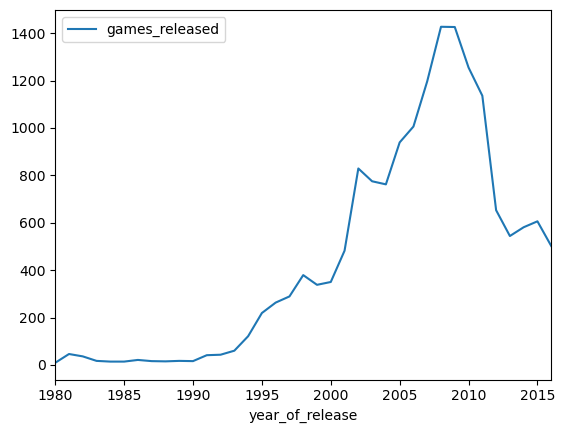

In [20]:
import matplotlib.pyplot as plt
games_per_year.plot();
plt.xlim([1980, 2016])
plt.show()


До 1990-х годов выпускалось мало игр, но мы видим плавный рост примерно с 1993 г. Скорее всего, это связано с выходом  PlayStation в 1993 г. Nintendo 64 в 1996 г.
С начала 2000-х количество игр резко увеличивается, появляется больше игровых платформ, индустрия игр быстро развивается. Этот рост продолжается примерно до 2008 г., после которого начинается не менее резкий упадок. Возможно, это происходит из-за развития мобильных игр. В 2016 г. количество выпущенных игр на игровых платформах примерно равен уровню 2002-2003 годов.


In [21]:
#как менялись продажи по платформам

#самые популярные платформы
platform_total_sales=data.groupby('platform').agg(platform_total_sales=('total_sales','sum'))
platform_total_sales=platform_total_sales.sort_values(by='platform_total_sales', ascending=False)
platform_total_sales

,platform_total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


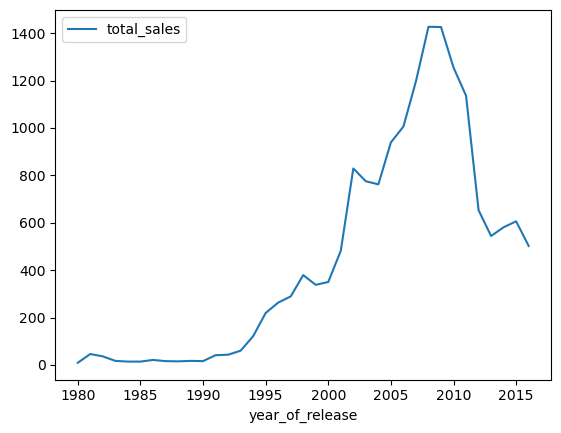

In [22]:
import matplotlib.pyplot as plt
data.pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='count').plot();

In [23]:
most_sales_platforms = data.query(" platform=='PS2' or platform=='X360' or platform=='PS3' or platform=='Wii' or platform=='DS'")
most_sales_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


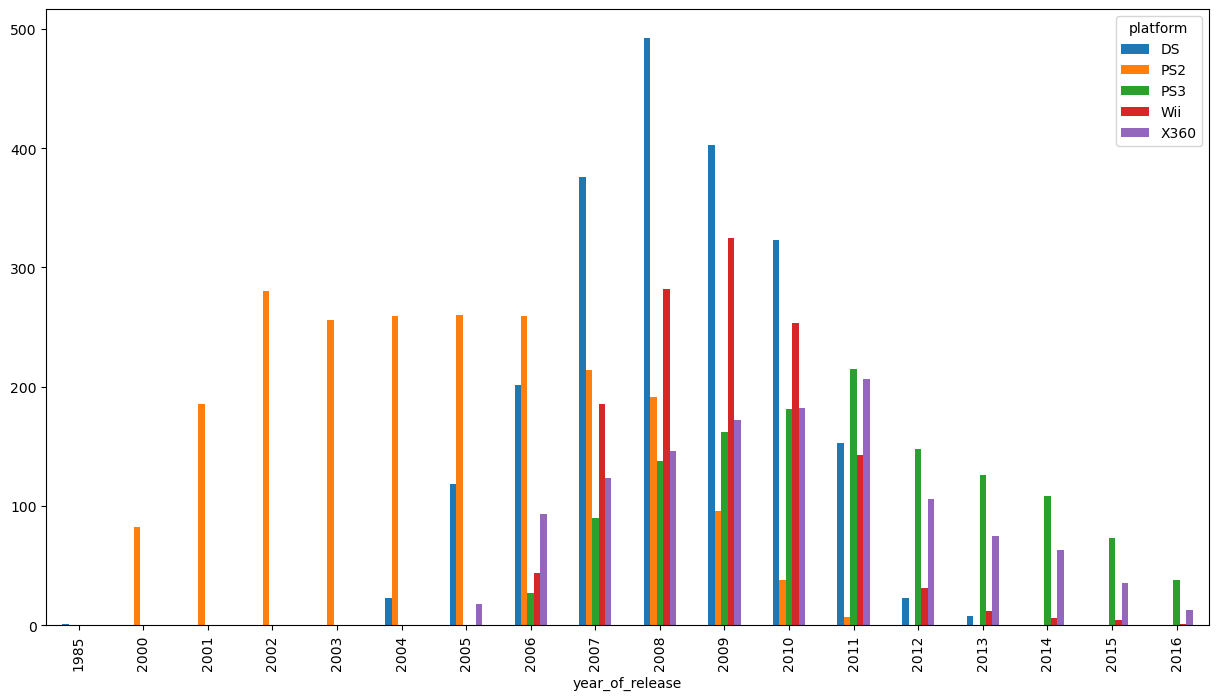

In [24]:
most_sales_platforms.pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='count').plot(kind='bar', figsize=(15,8));

Самая "долгоиграющая" платформа - PS2, она была популярна на протяжении примерно 6 лет. У других платформ, например, Ds и Wii, популярность длилась около 4, можно считать это средним сроком жизненного цикла платформ.

Далее возьмем данные за актуальный период - последние три года (2014-2016). Учитывая, что индустрия игр стремительно развивается, а актуальность платформ меняется довольно часто, более ранние данные вряд ли помогут построить прогноз на 2017 год. 

In [25]:
new_data=data.query(" year_of_release >= 2014")
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [26]:
new_data.pivot_table(
        index=('platform','year_of_release'),
        values='total_sales',
        aggfunc='sum')

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2014                    0.24
         2015                    0.12
PSV      2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2014                   54.07
         2015                   60.14
         2016                   26.15

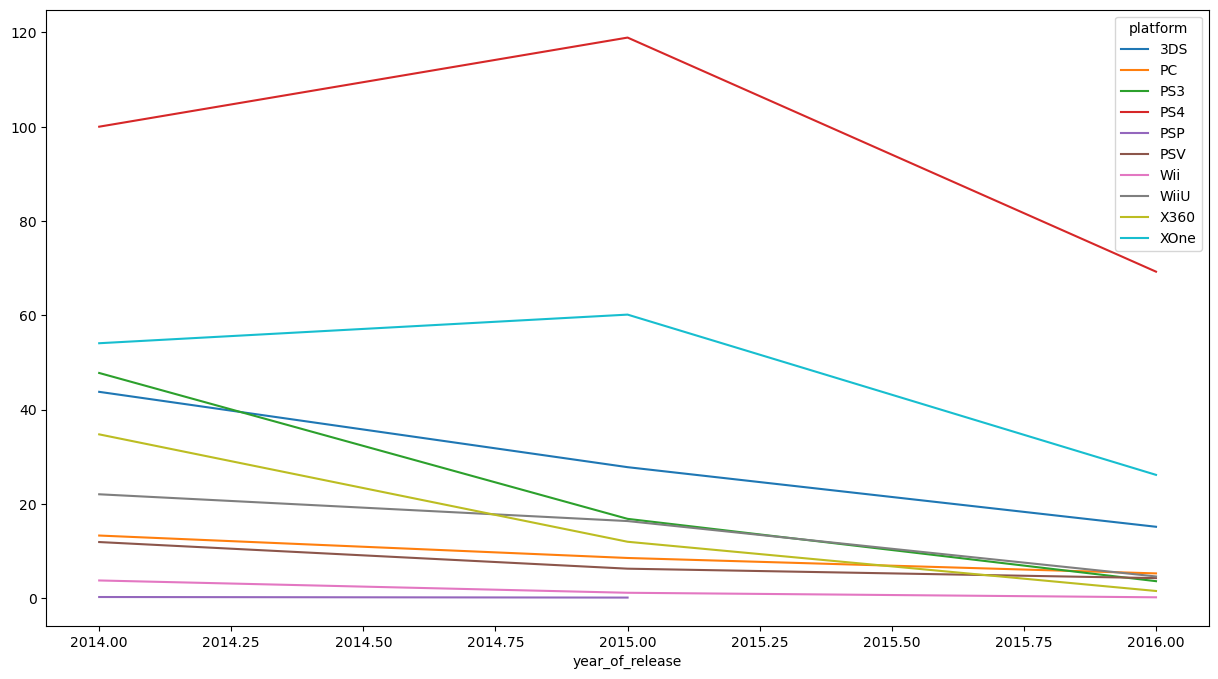

In [27]:
new_data.pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum').plot(figsize=(15,8));

Здесь мы наглядно видим сменяемость популярности - в период с 2014 по 2015 г. продажи PS3 падают, а PS4, наоборот, растут. С 2015 г. продажи падают у всех платформ. Однако в условиях проекта сказано, что "данные за 2016 год могут быть неполными", возможно, дело именно в этом. Рассмотрим самые прибыльные платформы на конец 2016 г. - PS4, XOne, 3DS, PS3, PC.

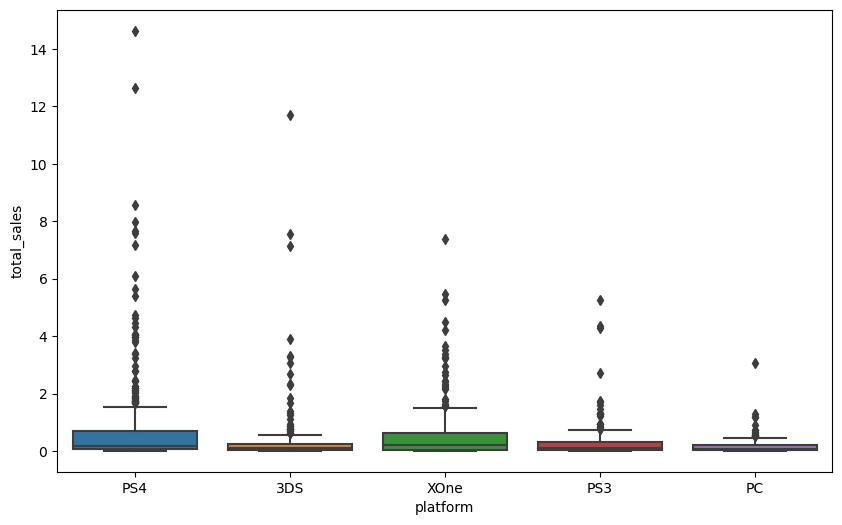

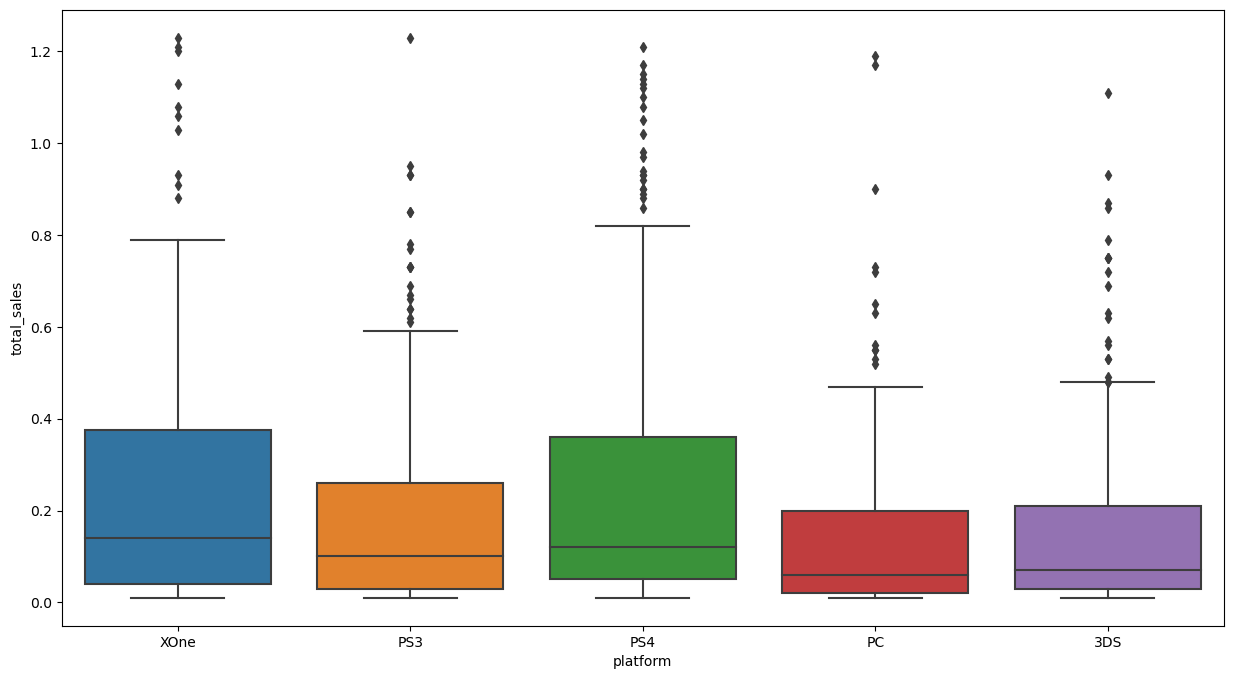

In [28]:
#боксплоты по глобальным продажам игр по платформам
top_platforms=new_data.query(" platform=='PS4' or platform=='XOne' or platform=='3DS' or platform=='PS3' or platform=='PC'")

import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=top_platforms, x='platform', y='total_sales')
#много выбросов, избавимся от них

top_platforms=top_platforms[top_platforms['total_sales']<1.25]
plt.figure(figsize=(15,8))
sns.boxplot(data=top_platforms, x='platform', y='total_sales');

Размах у всех разный, но медиана примерно на одном уровне.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

0.3135331728737122

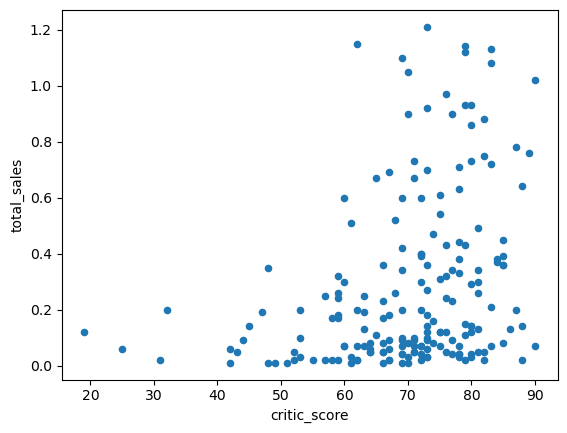

In [29]:
# корреляция для ps4
ps4=top_platforms[top_platforms['platform']=='PS4']
ps4.plot(x='critic_score', y='total_sales', kind='scatter')
ps4['total_sales'].corr(ps4['critic_score'])

0.04312713810577971

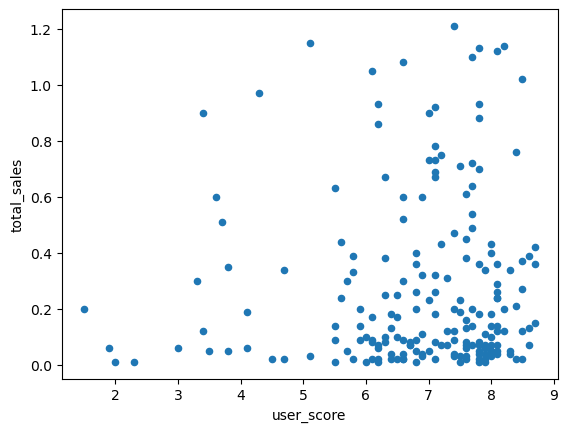

In [30]:
ps4.plot(x='user_score', y='total_sales', kind='scatter')
ps4['total_sales'].corr(ps4['user_score'])

In [31]:
ps4['critic_score'].corr(ps4['user_score'])

0.6238796230888289

Корреляция между отзывами критиков/пользователей и продажами слабая, при этом существует зависимость отзывов пользователей от отзывов критиков.

0.3777329925777233

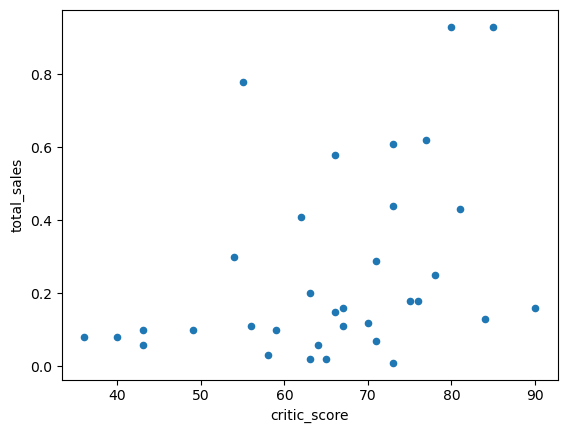

In [32]:
# корреляция для PS3
ps3=top_platforms[top_platforms['platform']=='PS3']
ps3.plot(x='critic_score', y='total_sales', kind='scatter')
ps3['total_sales'].corr(ps3['critic_score'])

0.03131420809658293

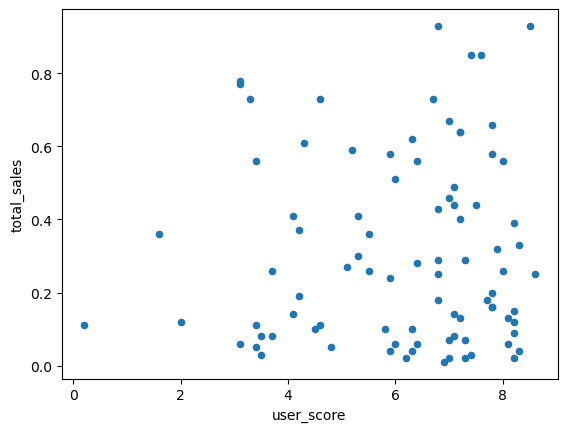

In [33]:
ps3.plot(x='user_score', y='total_sales', kind='scatter')
ps3['total_sales'].corr(ps3['user_score'])

In [34]:
ps3['critic_score'].corr(ps3['user_score'])

0.6787249679199796

0.3977858247724183

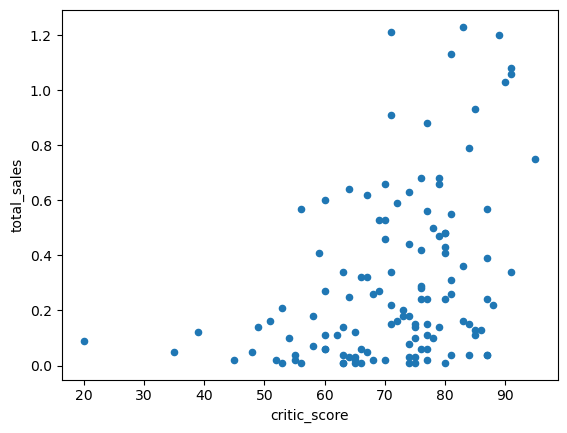

In [35]:
# корреляция для XOne
xone=top_platforms[top_platforms['platform']=='XOne']
xone.plot(x='critic_score', y='total_sales', kind='scatter')
xone['total_sales'].corr(xone['critic_score'])

-0.046980545644340135

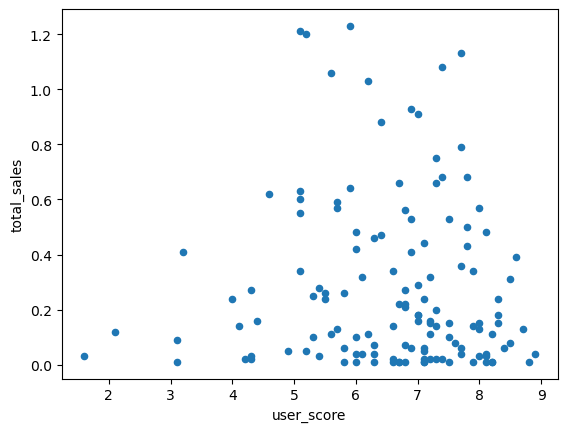

In [36]:
xone.plot(x='user_score', y='total_sales', kind='scatter')
xone['total_sales'].corr(xone['user_score'])

In [37]:
xone['critic_score'].corr(xone['user_score'])

0.49748397196301103

In [38]:
# корреляция для PC

0.3385598028184929

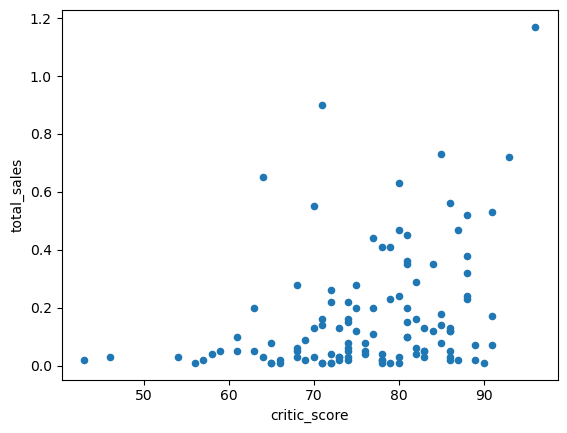

In [39]:
pc=top_platforms[top_platforms['platform']=='PC']
pc.plot(x='critic_score', y='total_sales', kind='scatter')
pc['total_sales'].corr(pc['critic_score'])

0.0675009906781846

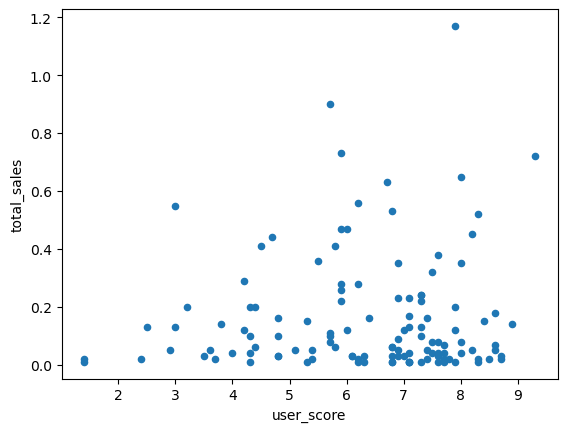

In [40]:
pc.plot(x='user_score', y='total_sales', kind='scatter')
pc['total_sales'].corr(pc['user_score'])

In [41]:
pc['critic_score'].corr(pc['user_score'])

0.46908082180505095

In [42]:
# корреляция для 3DS

0.3592262501781925

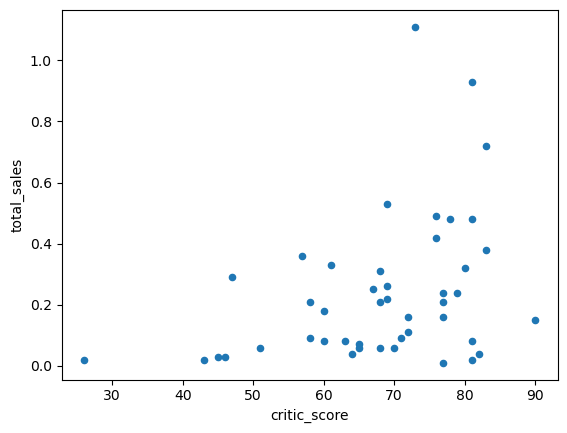

In [43]:
ds=top_platforms[top_platforms['platform']=='3DS']
ds.plot(x='critic_score', y='total_sales', kind='scatter')
ds['total_sales'].corr(ds['critic_score'])

0.061919863478392956

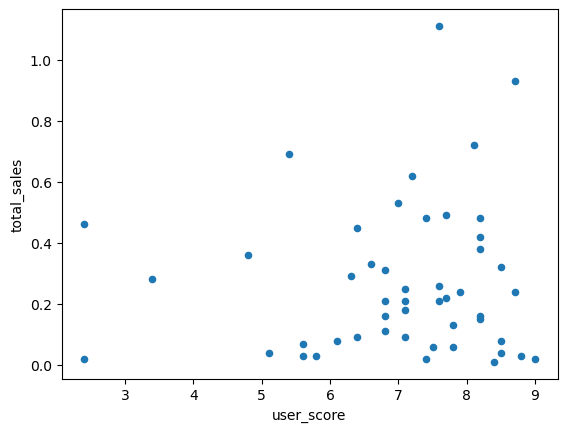

In [44]:
ds.plot(x='user_score', y='total_sales', kind='scatter')
ds['total_sales'].corr(ds['user_score'])

Во всех случаях продажи практически не зависят от оценки как критиков, так и пользователей. Для некоторых платформ существует средняя положительная корреляция между оценкой критиков и пользователей: чем выше одна, тем выше и вторая.

Далее посмотрим, какие продажи у игр разных жанров.

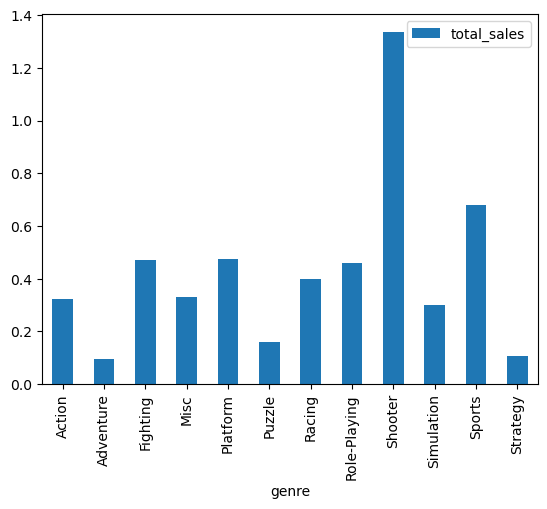

In [45]:
# распределение игр по жанрам
new_data.pivot_table(
        index='genre',
        values='total_sales',
        aggfunc='mean').plot(kind='bar');


Самый прибыльный жанр - это шутеры. Он почти в два раза популярнее второго по успешности жанра "спорт". Хуже всего продаются стратегии и приключения.


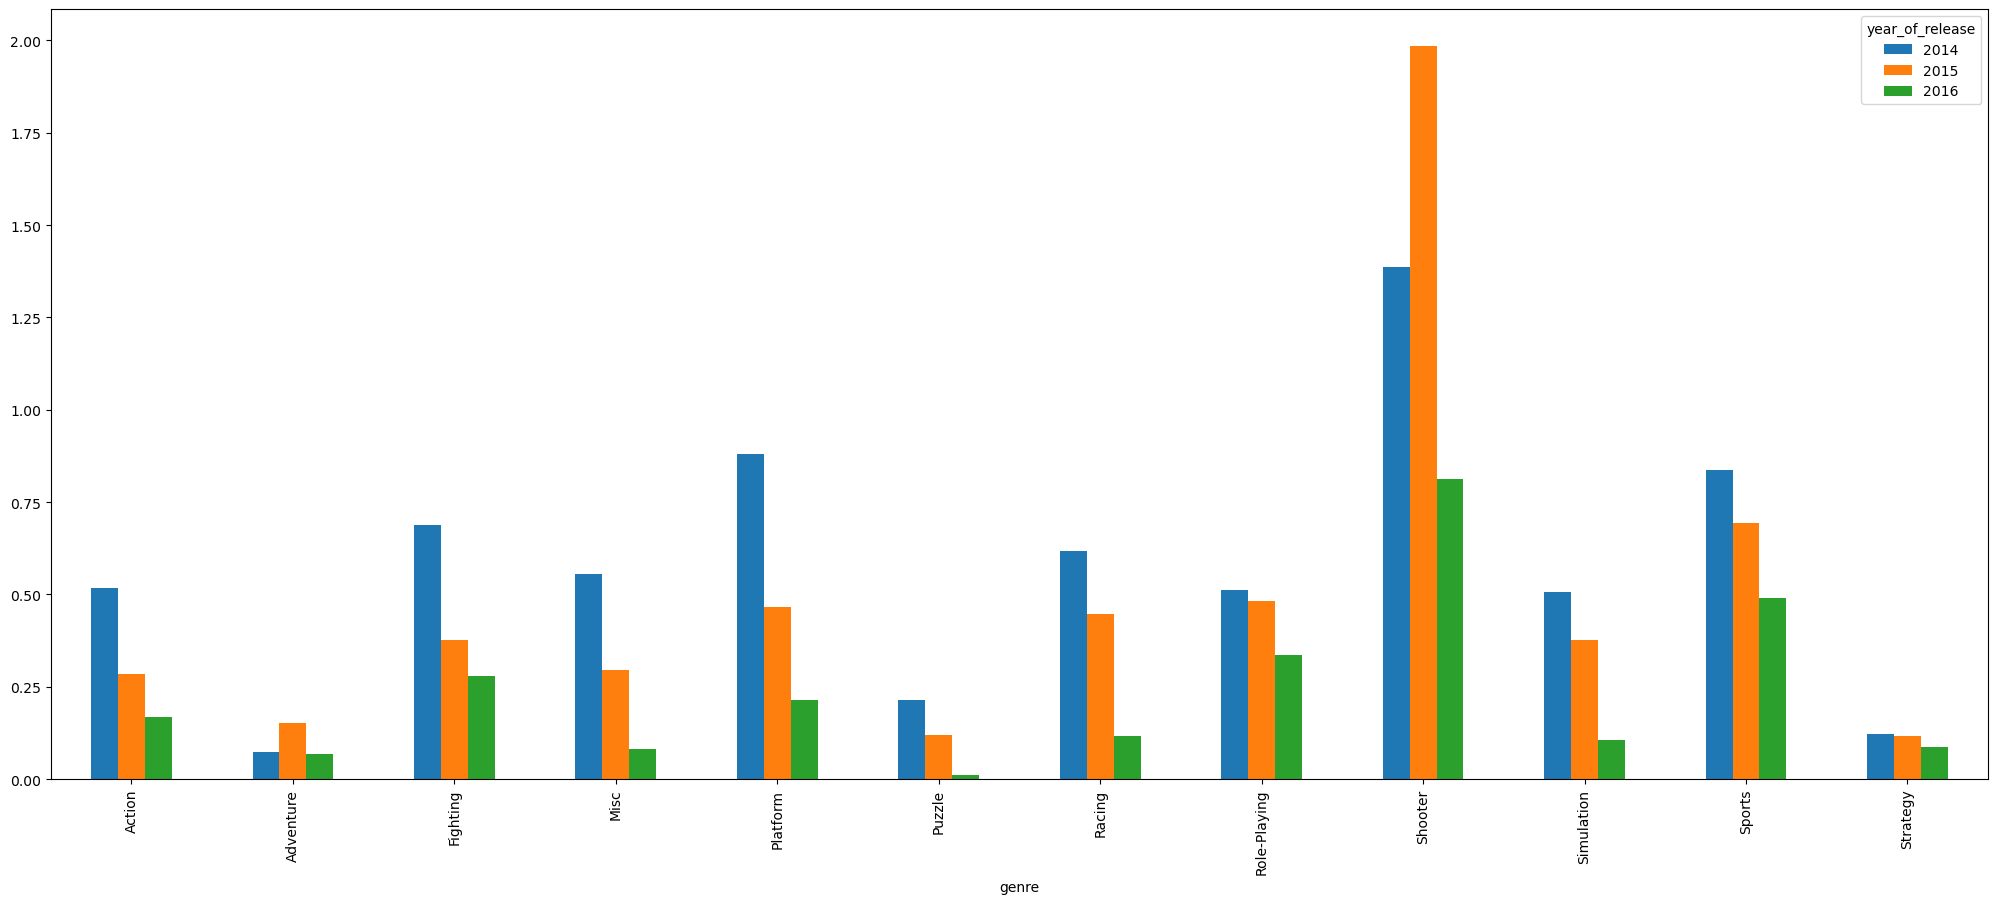

In [46]:
new_data.pivot_table(
        index='genre',
        columns='year_of_release',
        values='total_sales',
        aggfunc='mean').plot(kind='bar', figsize=(25,10));

В разбивке продаж игр разных жанров по годам мы видим, что самый перспективный жанр - шутеры, он показал рост с 2014 по 2015 год, и на 2016 г. является самым продаваемым.

# 4. Портрет пользователя каждого региона

Северная Америка

In [47]:
# самые популярные платформы
na_top_platforms=new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_top_platforms

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


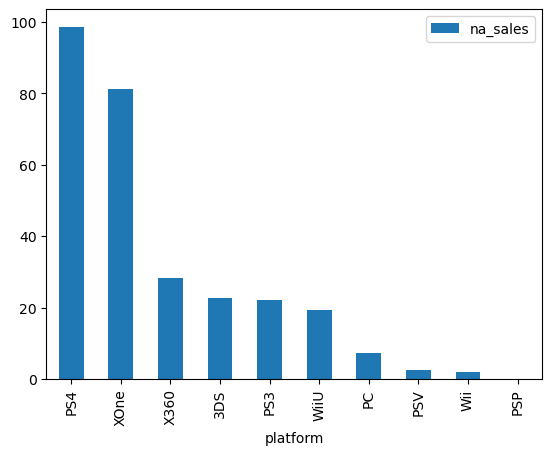

In [48]:
na_top_platforms.plot(kind='bar');

На первом и втором месте по продажам ожидаемо оказались игры на платформах PS4 и XOne. В топ-5 не вошел PC, в отличие от мировых продаж, его место занял X360. Другие две платформы в пятерке самых популярных - 3DS и PS3.

In [49]:
# самые популярные жанры
na_top_genres=new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_top_genres

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


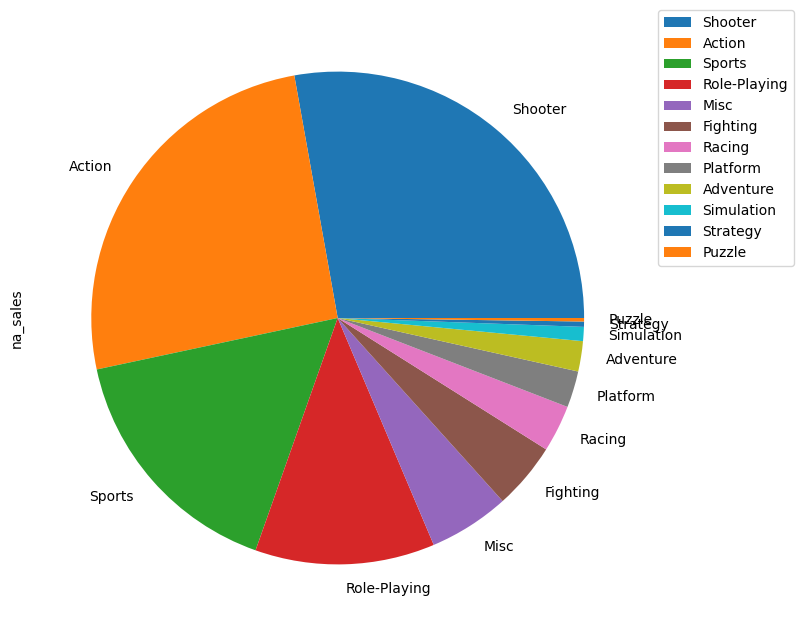

In [50]:
na_top_genres.plot(kind='pie',subplots=True, figsize=(15,8));
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 );

Самые популярные жанры в мире показывают высокие продажи и в Северной Америке - лидерами остаются шутеры, экшн и спортивные игры.

In [51]:
# рейтинг ESRB
na_top_rating=new_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_top_rating

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


Популярность рейтинга M ("mature") соотносится с самым продаваемым жанром, т.к. шутеры по определению содержат сцены насилия. Вторым самым массовым рейтингом является E ("for everyone"), т.е. без ограничений по возрасту.

In [52]:
#посмотрим, как распределяются продажи по рейтингу ESRB во всем мире
top_rating=new_data.pivot_table(index='rating', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
top_rating

,total_sales
rating,
M,226.54
E,133.13
T,99.13
E10+,71.68


Япония

In [53]:
# самые популярные платформы
jp_top_platforms=new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_top_platforms

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


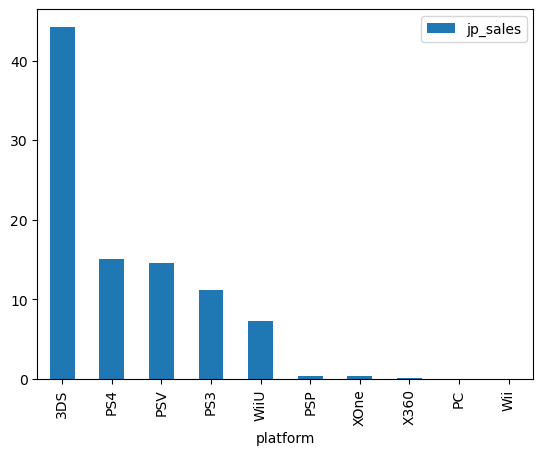

In [54]:
jp_top_platforms.plot(kind='bar');

В Японии самой популярной платформой оказалась Nintendo 3DS. WiiU также вошла в топ-5. Традиционно пользуются спросом PS4 и PS3, а также к ним присоединяется PSV.

In [55]:
# самые популярные жанры
jp_top_genres=new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_top_genres

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


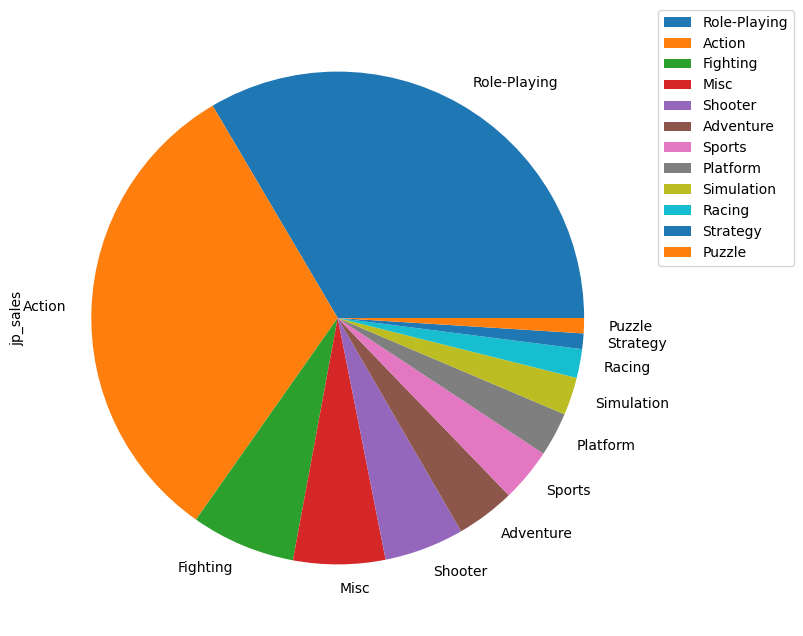

In [56]:
jp_top_genres.plot(kind='pie',subplots=True, figsize=(15,8));
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 );

Здесь результаты уже интереснее: на первом месте в Японии оказались игры-ролевики, далее экшн, а второй по популярности в мире жанр шутеров оказался лишь на пятом месте. В пятерку вошли файтинг - довольно непопулярный, судя по мировым продажам, - и misc (miscellaneous - не вошедшие в другие жанры).

In [57]:
# рейтинг ESRB
jp_top_rating=new_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_top_rating

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


Результаты продаж в зависимости от рейтинга в Японии опять отличаются от мировых: самым ходовым оказался T (teen). Это связано с тем, что продажи игр жанров, где есть сцены жестокости, ниже.

Европа

In [58]:
# самые популярные платформы
eu_top_platforms=new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_top_platforms

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


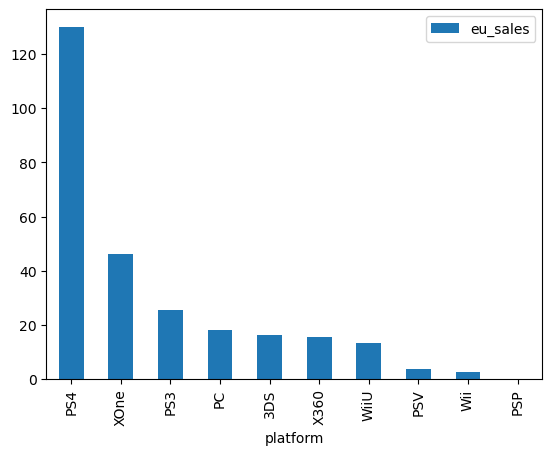

In [59]:
eu_top_platforms.plot(kind='bar');

In [60]:
# самые популярные жанры
eu_top_genres=new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_top_genres

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


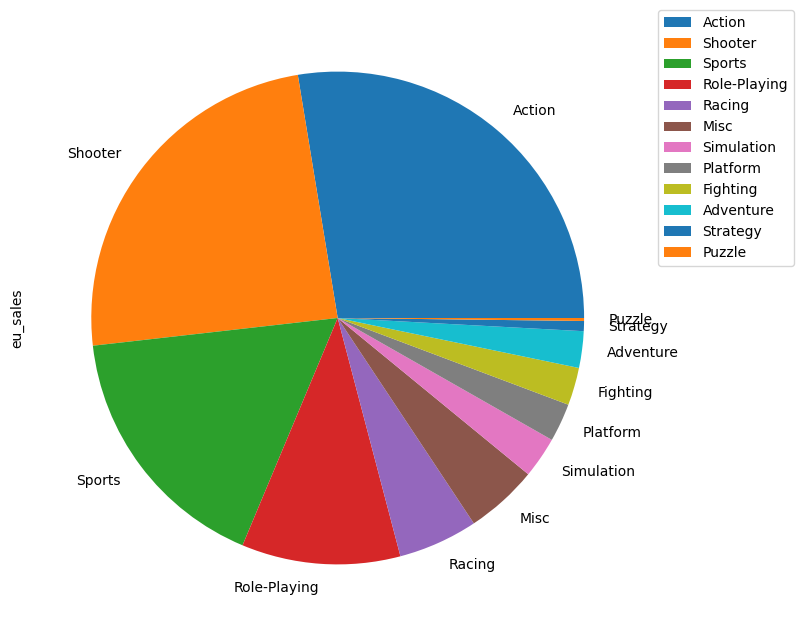

In [61]:
eu_top_genres.plot(kind='pie',subplots=True, figsize=(15,8));
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 );

In [62]:
# рейтинг ESRB
eu_top_rating=new_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_top_rating

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


Тенденции продаж игр в Европе мало отличаются от общемировых: популярными платформами по-прежнему остаются PS4, XOne, PS3, PC, 3DS. Популярные жанры по убыванию: экшн, шутеры, спорт, ролевые и гонки. Соответственно, и самый продаваемый рейтинг - М.

# 5. Гипотезы

Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средний рейтинг платформы Xbox One равен среднему рейтингу PC.  
Альтернативная гипотеза: средние рейтинги этих платформ не равны.  
Мы сравниваем среднее двух независимых генеральных совокупностей, для этого воспользуемся методом ttest_ind().  
Данные берем только за актуальный период, ведь нам нужно понять, какие платформы актуальны именно сейчас, а не просто получить историческую справку.

In [63]:
from scipy import stats as st
xone=new_data.query("platform=='XOne'")
xone_user_score=xone['user_score']
pc=new_data.query("platform=='PC'")
pc_user_score=pc['user_score']

alpha=.05 #уровень статистической значимости
results_hypothesis_one=st.ttest_ind(xone_user_score.dropna(), pc_user_score.dropna(), equal_var=False)
print('p-значение', results_hypothesis_one.pvalue)
if results_hypothesis_one.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Таким образом, первая гипотеза подтвердилась: средний пользовательский рейтинг платформы Xbox One действительно равен среднему пользовательскому рейтингу PC.

Гипотеза 2. Средние пользовательские рейтинги жанров "экшн" и "спорт" разные.

Нулевая гипотеза: средний пользовательский рейтинг игр жанра  "экшн" равен среднему пользовательскому рейтингу игр жанра "спорт".  
Альтернативная гипотеза: средние рейтинги игр этих жанров не равны.  
Мы так же сравниваем среднее двух независимых генеральных совокупностей с помощью метода ttest_ind().

In [66]:
action=new_data.query("genre=='Action'")
action_user_score=action['user_score'].dropna()
sports=new_data.query("genre=='Sports'")
sports_user_score=sports['user_score'].dropna()

#len(action)
#len(sports) 

alpha=.05 #уровень статистической значимости
results_hypothesis_two=st.ttest_ind(action_user_score, sports_user_score, equal_var=False) #выборки сильно отличаются по размеру, поэтому указываем параметр equal_var=False 
print('p-значение', results_hypothesis_two.pvalue)
if results_hypothesis_two.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [67]:
action_user_score.mean()

6.760606060606061

In [68]:
sports_user_score.mean()

5.2251968503937

По результатам теста мы отвергаем нулевую гипотезу, значит, средние рейтинги жанров "экшн" и "спорт" не равны. 

# 6. Вывод

Мы изучили данные о продажах игр и проанализировали, какие игры и платформы пользуются спросом в период с 2014 по 2016 г.   

Самыми популярными платформами по глобальным продажам являются Xbox One, PS3, PS4, PC, Nintendo 3DS. Распространенность платформ меняется в зависимости от региона: в Японии предпочитают Nintendo, а в Северной Америке и Европе Xbox One, PS4 и PS3. Игры на ПК хорошо продаются в Европе, а в Америке они не вошли в топ-5.  

Самые популярные жанры - это экшн, шутеры, спортивные и ролевые. Они показывают высокие продажи в том числе в Америке и Европе, но шутеры и спортивные менее популярны в Японии.

Рейтинг ESRB показывает, что игры для взрослой аудитории пользуются большим спросом. Япония отличилась и здесь, там выбирают игры с менее жесткими возрастными ограничениями. Интересным оказалось то, что оценки критиков  мало влияют на продажи, только на оценку пользователей.  

Также мы проверили две гипотезы: первая, о равенстве среднего пользовательского рейтинга платформ Xbox One и PC, подтвердилась. Вторая гипотеза была отвергнута: средние рейтинги жанров "экшн" и "спорт" не равны, в целом игроки дают более высокие оценки жанру "экшн".  

По сделанным выводам можно предположить, какие на какие игры стоило бы делать ставку в 2017 г. (ориентируемся на мировые показатели): экшн и шутеры с рейтингом М на самых популярных платформах Xbox, PS, PC, Nintendo.

